In [73]:
from sklearn.datasets import fetch_20newsgroups
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import homogeneity_score, adjusted_mutual_info_score, completeness_score, adjusted_rand_score, v_measure_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [2]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
comb_train_x = []
train_y = []

In [4]:
for i in range(len(categories)):
    temp_cat = []
    temp_cat.append(categories[i])
    temp_train_x = fetch_20newsgroups(subset='all', categories=temp_cat, shuffle=True, random_state=42)
    comb_train_x += temp_train_x.data
    train_y += ([i] * len(temp_train_x.target))

<h3>Creating a TFxIDF vector representation of training and test data</h3><br> A CountVectorizer object is created to first build a vocabulary of words and their respective counts, and then transform the sentences by replacing the words with their respective counts. A TfIdfTransformer object is created and then fit on the training dataset to then extract TfIdf features from each document in both training and test datasets. 

In [45]:
vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
tfidf_train_x = vectorizer.fit_transform(comb_train_x)

In [46]:
print('Dimensions of the TFIDF matrix are: ' + str(tfidf_train_x.shape))

Dimensions of the TFIDF matrix are: (18846, 52295)


In [47]:
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=35)
km.fit(tfidf_train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=35, tol=0.0001, verbose=0)

In [48]:
main_cont = contingency_matrix(train_y, km.labels_)

In [49]:
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))

Homogeneity: 0.299
Completeness: 0.382
V-measure: 0.336
Adjusted Rand-Index: 0.097
Adjusted Mutual Info: 0.297


In [50]:
svd_model = TruncatedSVD(n_components=1000, random_state=0)
train_x2 = svd_model.fit_transform(tfidf_train_x)

In [51]:
r_values = [1, 2, 3, 5, 10, 20, 50, 100, 300]
homogeneity = []
completeness = []
v_mes = []
rand_ind = []
mutual_info = []

In [52]:
for r in r_values:
    km.fit(train_x2[:,:r])
    homogeneity.append(homogeneity_score(train_y, km.labels_))
    completeness.append(completeness_score(train_y, km.labels_))
    v_mes.append(v_measure_score(train_y, km.labels_))
    rand_ind.append(adjusted_rand_score(train_y, km.labels_))
    mutual_info.append(adjusted_mutual_info_score(train_y, km.labels_))

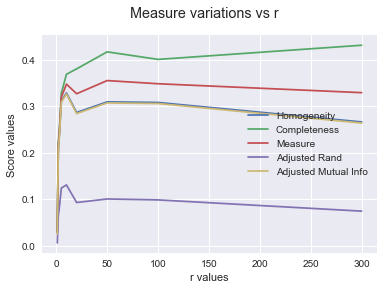

In [77]:
fig = plt.figure()

plt.plot(r_values, homogeneity, label='Homogeneity Values')
plt.plot(r_values, completeness, label='Completeness Values')
plt.plot(r_values, v_mes, label='V Measure Values')
plt.plot(r_values, rand_ind, label='Adjusted Rand Values')
plt.plot(r_values, mutual_info, label='Adjusted Mutual Info Values')
pylab.ylabel('Score values')
pylab.xlabel('r values')
fig.suptitle('Measure variations vs r')

plt.legend(['Homogeneity', 'Completeness', 'Measure', 'Adjusted Rand', 'Adjusted Mutual Info'], loc='right')
plt.show()

In [56]:
best_train = PCA(n_components=2).fit_transform(train_x2[:,:300])
km.fit(best_train)
y_kmeans = km.predict(best_train)

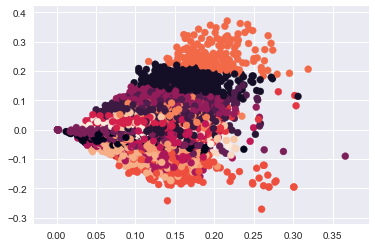

In [57]:
fig = plt.figure()

plt.scatter(train_x2[:,:2][:,0], train_x2[:,:2][:,1], c=y_kmeans)

plt.show()

In [59]:
import seaborn as sns;
sns.set()

In [60]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax = sns.heatmap(main_cont, annot=True, fmt='d')

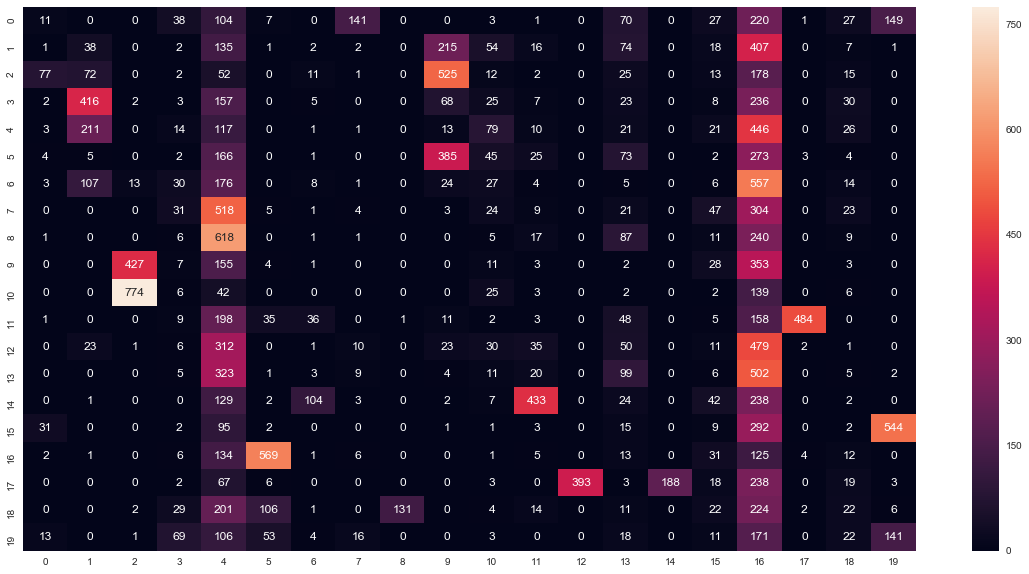

In [61]:
plt.show()

In [62]:
best_cont = contingency_matrix(train_y, km.labels_)

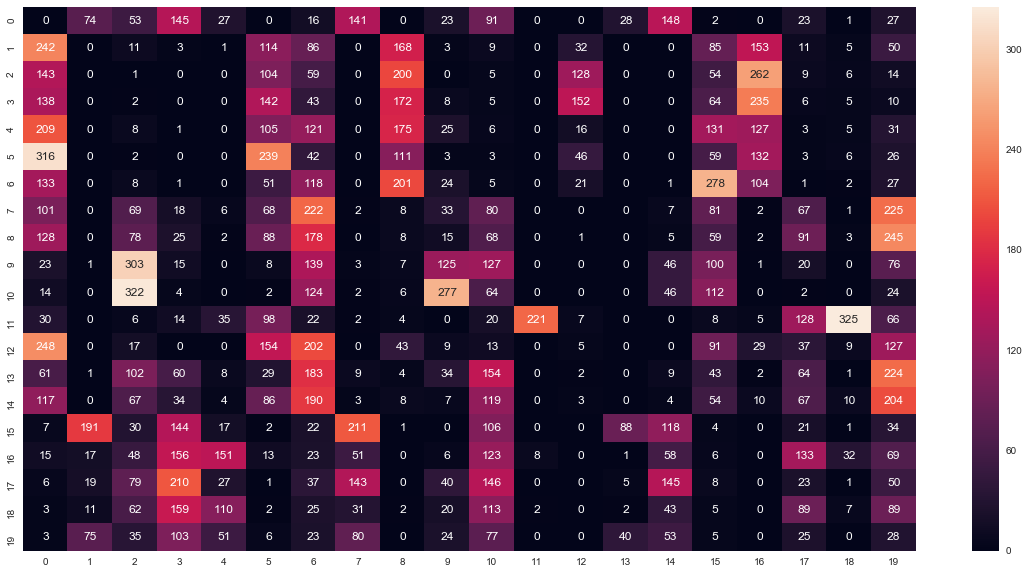

In [64]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax = sns.heatmap(best_cont, annot=True, fmt='d')
plt.show()

In [70]:
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))

Homogeneity: 0.266
Completeness: 0.431
V-measure: 0.329
Adjusted Rand-Index: 0.074
Adjusted Mutual Info: 0.264
